In [1]:
import datetime
import os
import time
import pandas as pd
import string
import collections


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


In [4]:
#select the data source
#the target data
path='C:/data/stress.csv'
Data=pd.read_csv(path)
print("Selected Data Source:\n",Data)

Selected Data Source:
      Gender  Age  Have you recently experienced stress in your life?  \
0         0   20                                                  3    
1         0   20                                                  2    
2         0   20                                                  5    
3         1   20                                                  3    
4         0   20                                                  3    
..      ...  ...                                                ...    
838       0   21                                                  3    
839       1   19                                                  3    
840       1   19                                                  4    
841       0   20                                                  5    
842       0   19                                                  4    

     Have you noticed a rapid heartbeat or palpitations?  \
0                                                   

In [5]:
#Transform the target to numeric array
Encoder=preprocessing.LabelEncoder()
Encoded_Data=Data.apply(preprocessing.LabelEncoder().fit_transform)
print("Transformed Data:\n",Encoded_Data)
Numeric_Array=Encoded_Data.values
print("Numeric Array\n", Numeric_Array)


Transformed Data:
      Gender  Age  Have you recently experienced stress in your life?  \
0         0    5                                                  2    
1         0    5                                                  1    
2         0    5                                                  4    
3         1    5                                                  2    
4         0    5                                                  2    
..      ...  ...                                                ...    
838       0    6                                                  2    
839       1    4                                                  2    
840       1    4                                                  3    
841       0    5                                                  4    
842       0    4                                                  3    

     Have you noticed a rapid heartbeat or palpitations?  \
0                                                    3  

In [6]:
 #select test sample
split=10
Training_Sample=Numeric_Array[:split,:]
print(("Training Sample:\n", Training_Sample))

('Training Sample:\n', array([[0, 5, 2, 3, 1, 4, 0, 1, 0, 1, 1, 2, 0, 4, 0, 1, 2, 0, 3, 0, 1, 0,
        2, 0, 1, 1],
       [0, 5, 1, 2, 1, 0, 0, 0, 0, 3, 1, 0, 1, 0, 1, 3, 2, 1, 0, 0, 2, 1,
        0, 3, 1, 1],
       [0, 5, 4, 3, 1, 1, 0, 2, 3, 1, 2, 1, 2, 3, 4, 1, 1, 1, 1, 0, 3, 0,
        0, 1, 0, 1],
       [1, 5, 2, 3, 2, 1, 1, 2, 3, 2, 4, 1, 3, 0, 1, 2, 0, 0, 1, 0, 1, 0,
        0, 4, 2, 1],
       [0, 5, 2, 2, 2, 1, 1, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 3,
        1, 1, 1, 1],
       [0, 5, 2, 3, 2, 1, 2, 2, 3, 0, 2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1,
        3, 3, 3, 1],
       [0, 5, 1, 1, 0, 3, 3, 2, 3, 0, 2, 3, 1, 0, 2, 3, 3, 3, 1, 2, 3, 2,
        2, 2, 1, 1],
       [0, 5, 4, 4, 4, 1, 3, 1, 0, 0, 1, 1, 3, 0, 1, 0, 0, 3, 1, 3, 2, 0,
        0, 0, 4, 1],
       [0, 5, 2, 1, 0, 4, 2, 4, 0, 0, 1, 2, 1, 2, 2, 3, 3, 3, 1, 3, 3, 2,
        0, 4, 0, 1],
       [0, 6, 2, 3, 1, 0, 0, 1, 0, 1, 2, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 3, 1, 2]]))


In [7]:
#select test sample
Test_Sample=Numeric_Array[split:,:]
print("Test Sample:\n", Test_Sample)

Test Sample:
 [[1 4 1 ... 2 0 2]
 [1 5 4 ... 2 0 1]
 [0 5 2 ... 2 1 1]
 ...
 [1 4 3 ... 4 2 1]
 [0 5 4 ... 4 0 1]
 [0 4 3 ... 4 3 1]]


In [8]:
#select input attributes from training sample
XTrain_Sample=Training_Sample[:,:-1]
print("Input(Indipendent) Attributes of training sample\n", XTrain_Sample)

Input(Indipendent) Attributes of training sample
 [[0 5 2 3 1 4 0 1 0 1 1 2 0 4 0 1 2 0 3 0 1 0 2 0 1]
 [0 5 1 2 1 0 0 0 0 3 1 0 1 0 1 3 2 1 0 0 2 1 0 3 1]
 [0 5 4 3 1 1 0 2 3 1 2 1 2 3 4 1 1 1 1 0 3 0 0 1 0]
 [1 5 2 3 2 1 1 2 3 2 4 1 3 0 1 2 0 0 1 0 1 0 0 4 2]
 [0 5 2 2 2 1 1 3 3 3 3 0 0 0 1 0 1 2 0 1 1 3 1 1 1]
 [0 5 2 3 2 1 2 2 3 0 2 0 1 1 2 1 1 2 0 1 2 1 3 3 3]
 [0 5 1 1 0 3 3 2 3 0 2 3 1 0 2 3 3 3 1 2 3 2 2 2 1]
 [0 5 4 4 4 1 3 1 0 0 1 1 3 0 1 0 0 3 1 3 2 0 0 0 4]
 [0 5 2 1 0 4 2 4 0 0 1 2 1 2 2 3 3 3 1 3 3 2 0 4 0]
 [0 6 2 3 1 0 0 1 0 1 2 3 2 1 1 0 0 0 0 0 0 0 1 3 1]]


In [9]:
#select output attribute from training sample
YTrain_Sample=Training_Sample[:,-1]
print("Ouput(Dependent) Attributes of training sample\n", YTrain_Sample)

Ouput(Dependent) Attributes of training sample
 [1 1 1 1 1 1 1 1 1 2]


In [10]:
#select input attributes from test sample
XTest_Sample=Test_Sample[:,:-1]
print("Indipendent Attributes of test sample\n\n", XTest_Sample)

Indipendent Attributes of test sample

 [[1 4 1 ... 1 2 0]
 [1 5 4 ... 1 2 0]
 [0 5 2 ... 2 2 1]
 ...
 [1 4 3 ... 3 4 2]
 [0 5 4 ... 3 4 0]
 [0 4 3 ... 1 4 3]]


In [11]:
#select output attributes from test sample
Actual_YTest_Sample=Test_Sample[:,-1]
print("Dependent Attributes of test sample\n\n", Actual_YTest_Sample)


Dependent Attributes of test sample

 [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 2 0
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 2 2 1 1 0 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [12]:
#Compress input attributes data training sample into two attributes
# Defining PCA object for compressing the attributes
pca = PCA(n_components =2)
#use PCA objects to compress the input attributes of the Training Sample
Compressed_XTrain_Sample = pca.fit_transform(XTrain_Sample)
print("Compressed input atributes of Training Sample:\n",Compressed_XTrain_Sample)


Compressed input atributes of Training Sample:
 [[ 0.48275615 -4.35302279]
 [-0.79819383 -1.71741264]
 [-0.70571239 -1.30185357]
 [-2.60526206  0.08809352]
 [-0.71792366  0.96371234]
 [-0.44861209  2.1108995 ]
 [ 4.62310474  1.56672748]
 [-2.76580901  4.55689446]
 [ 5.81570406  0.17572533]
 [-2.8800519  -2.08976364]]


In [13]:
Compressed_XTest_Sample = pca.fit_transform(XTest_Sample)
print("Compressed input atributes of Training Sample:\n",Compressed_XTest_Sample)

Compressed input atributes of Training Sample:
 [[-3.12230492 -3.09842844]
 [ 0.37879557 -1.62626041]
 [-2.17011116  3.00855855]
 ...
 [-0.68331217 -0.54259691]
 [ 2.58352322 -1.44612084]
 [-2.06484054 -0.99715731]]


In [14]:
#Classification phase
#Select necessary libraries
from sklearn.neighbors import KNeighborsClassifier
#Define KNN classifier model object
KNNClassifier_Object = KNeighborsClassifier(n_neighbors=5)
#Train KNN classifier model
Trained_KNNClassifier_Object=KNNClassifier_Object.fit(Compressed_XTrain_Sample, YTrain_Sample)
print(Trained_KNNClassifier_Object)

KNeighborsClassifier()


In [15]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


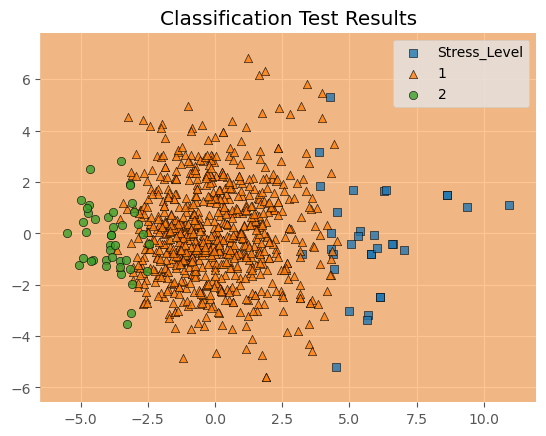

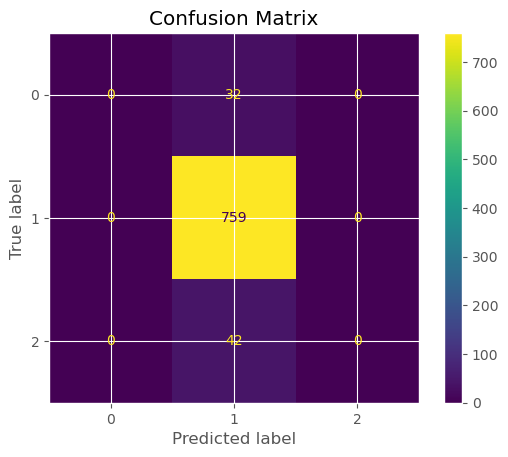

Classification Test results
      Actual_Classes  Predicted_Classes
0                 2                  1
1                 1                  1
2                 1                  1
3                 1                  1
4                 1                  1
..              ...                ...
828               1                  1
829               2                  1
830               1                  1
831               1                  1
832               1                  1

[833 rows x 2 columns]


In [16]:
# Imports
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Predict classes for the test samples
Predicted_YTest_Sample = Trained_KNNClassifier_Object.predict(Compressed_XTest_Sample)

# -------------------------------
# Visualize Decision Boundaries
# -------------------------------
# Note: X must have 2 features for plot_decision_regions
plot_decision_regions(Compressed_XTest_Sample, Actual_YTest_Sample, 
                      clf=Trained_KNNClassifier_Object, legend=2)
plt.title('Classification Test Results')
Legend = plt.legend()
Legend.get_texts()[0].set_text('Stress_Level')
plt.show()

# -------------------------------
# Confusion Matrix
# -------------------------------
ConfusionMatrixDisplay.from_predictions(Actual_YTest_Sample, Predicted_YTest_Sample)
plt.title('Confusion Matrix')
plt.show()

# -------------------------------
# Tabulate Testing Results
# -------------------------------
Both_YTest_Sample = {
    'Actual_Classes': Actual_YTest_Sample,
    'Predicted_Classes': Predicted_YTest_Sample
}
Tabulated_Test_Results = pd.DataFrame(Both_YTest_Sample, columns=['Actual_Classes','Predicted_Classes'])
print("Classification Test results\n", Tabulated_Test_Results)


In [17]:
#pip install pandas_ml


In [18]:
#pip install jaccard_score

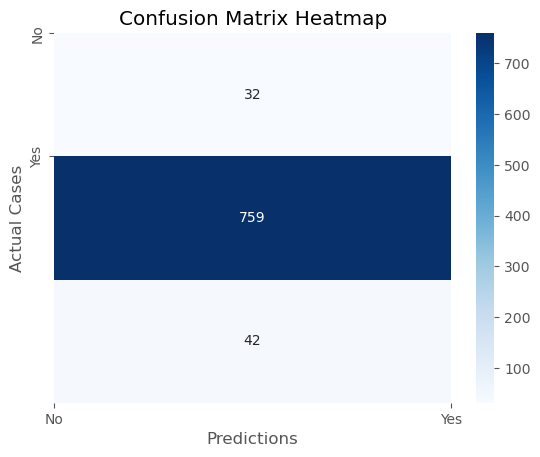

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming Both_YTest_Sample is already defined
Test_Results = pd.DataFrame(Both_YTest_Sample)

# Confusion matrix
confusion_matrix1 = pd.crosstab(
    Test_Results['Actual_Classes'],
    Test_Results['Predicted_Classes'],
    rownames=['Actual_Classes'],
    colnames=['Predicted_Classes']
)

# Plot heatmap
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix1, annot=True, fmt='d', cmap='Blues', ax=ax)

# Set tick positions and labels
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['No','Yes'])
ax.set_yticklabels(['No','Yes'])

ax.set_xlabel('Predictions')
ax.set_ylabel('Actual Cases')
ax.set_title('Confusion Matrix Heatmap')
plt.show()


In [20]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(Actual_YTest_Sample, Predicted_YTest_Sample)

# Convert to percentage
accuracy_percent = accuracy * 100

print(f"Model Accuracy: {accuracy_percent:.2f}%")


Model Accuracy: 91.12%


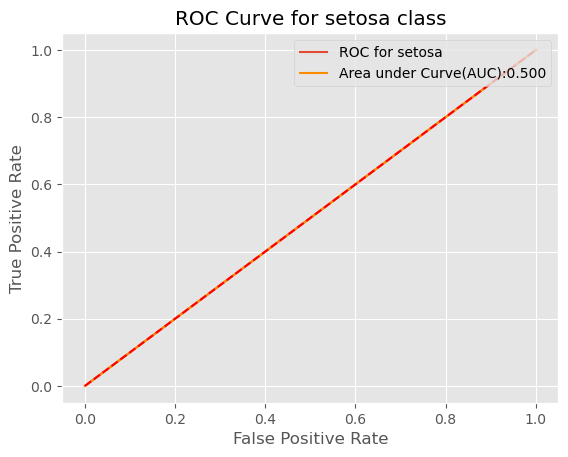

In [21]:
import sklearn.metrics as metrics
#calculate the area under the ROC for setosa class
setosa_fpr, setosa_tpr,setosa_thresholds=metrics.roc_curve(Actual_YTest_Sample, Predicted_YTest_Sample,pos_label=0)
setosa_auc = metrics.auc(setosa_fpr,setosa_tpr)
#plot the ROC curve for setosa class
plt.plot(setosa_fpr, setosa_tpr, label = 'ROC for setosa')
plt.plot(setosa_fpr,setosa_tpr,color='darkorange',
 label='Area under Curve(AUC):%1.3f'% setosa_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve for setosa class')
plt.legend(loc="upper right")
plt.show()


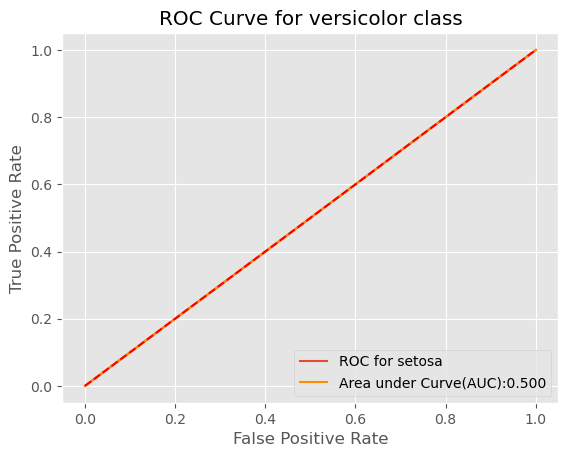

In [22]:
#validation of the ROC Curve
#calculate are under the ROC curve for versicolor color
versicolor_fpr,versicolor_tpr,vesricolor_thresholds = metrics.roc_curve(Actual_YTest_Sample, Predicted_YTest_Sample,
pos_label=1)
versicolor_auc=metrics.auc(versicolor_fpr,versicolor_tpr)
#plot ROC curve
#plot the ROC curve for setosa class
plt.plot(versicolor_fpr, versicolor_tpr, label = 'ROC for setosa')
plt.plot(versicolor_fpr,versicolor_tpr,color='darkorange',
 label='Area under Curve(AUC):%1.3f'% versicolor_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve for versicolor class')
plt.legend(loc="lower right")
plt.show()


In [23]:
import numpy as np

# Count how many of each class are in the true test labels
print(np.bincount(Actual_YTest_Sample))



[ 32 759  42]


In [24]:
from sklearn.metrics import classification_report

print(classification_report(Actual_YTest_Sample, Predicted_YTest_Sample))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.91      1.00      0.95       759
           2       0.00      0.00      0.00        42

    accuracy                           0.91       833
   macro avg       0.30      0.33      0.32       833
weighted avg       0.83      0.91      0.87       833



C:\Users\lea\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lea\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lea\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
import os
os.getcwd()




'C:\\Users\\lea'